In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from tensorflow.image import central_crop

In [35]:
def load_dataset():
    with h5py.File("../datasets/raw/qg/quark-gluon_train-set_n793900.hdf5", "r") as f:
        n = 793900
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        data = {keys[0]: f[keys[0]][0:n],
                keys[3]: f[keys[3]][0:n]}

        # qg = np.asarray(f['X'][()], dtype=np.float32)
        # py = np.asarray(f['y'][()], dtype=np.float32)
        # print("Loaded photon dataset!")

    # with h5py.File("/content/drive/My Drive/electron-photon-dataset/electron.hdf5", "r") as f:
    #     ex = np.asarray(f['X'][()], dtype=np.float32)
    #     ey = np.asarray(f['y'][()], dtype=np.float32)
    #     print("Loaded electron dataset!")

    # print("Photon dataset shape:", px.shape, py.shape)
    # print("Electron dataset shape:", ex.shape, ey.shape)
    # return px,py,ex,ey
    return data

In [36]:
data = load_dataset()

X_jets (793900, 125, 125, 3)
m0 (793900,)
pt (793900,)
y (793900,)


tcmalloc: large alloc 148856250368 bytes == 0x84e0000 @  0x7f9c44dd4680 0x7f9c44df42ec 0x7f9c39652fae 0x7f9c3965388e 0x7f9c396b1d87 0x7f9c396b38da 0x7f9b95d1acf9 0x7f9b95d16568 0x505166 0x56bbfa 0x569dba 0x4eb54f 0x7f9b988b2aac 0x7f9b988bb6ba 0x5f74f6 0x50c358 0x5fe736 0x59eb75 0x5139cc 0x56bf28 0x5f6cd6 0x56bacd 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6


In [37]:
!free

              total        used        free      shared  buff/cache   available
Mem:      350811680   160451032   184771660        1944     5588988   188338080
Swap:             0           0           0


In [38]:
print(data['X_jets'].shape)
print(max(data['y']), min(data['y']))

zeros = (data['y'] == 0)
ones = (data['y'] == 1)
print(sum(ones), sum(zeros))

(793900, 125, 125, 3)
1.0 0.0
396950 396950


In [39]:
data0 = data['X_jets'][zeros]
data1 = data['X_jets'][ones]
del data

tcmalloc: large alloc 74428129280 bytes == 0x234a4e2000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c396b2126 0x7f9c397447ea 0x7f9c3974524b 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa 0x569dba 0x5f6eb3 0x50bc2c 0x5f6082 0x56d2d5
tcmalloc: large alloc 74428129280 bytes == 0x34a3114000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c396b2126 0x7f9c397447ea 0x7f9c3974524b 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa 0x569dba 0x5f6eb3 0x50bc2c 0x5f6082 0x56d2d5


In [40]:
def crop_center(img,cropx,cropy):
    x,y = img.shape[1:3]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[:,startx:startx+cropx,starty:starty+cropy,:]

In [41]:
def display_data(data, label, thresh=0):
    fig = plt.figure(figsize=(12,12))
    r = 1
    c = 3
    for i in range(3):
        fig.add_subplot(r,c,i+1)
        if thresh:
            m = np.mean(data[:, :,:, i], axis=0).mean()
            plt.imshow(np.mean(data[:, :,:, i], axis=0) >= m)
        else:
            plt.imshow(np.log(np.mean(data[:, :,:, i], axis=0)))

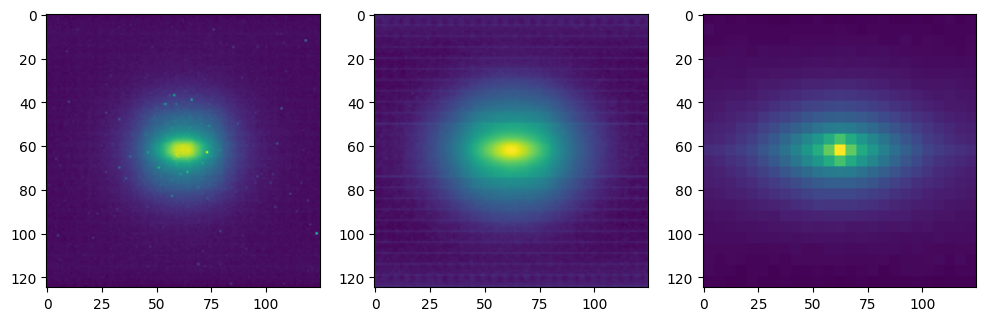

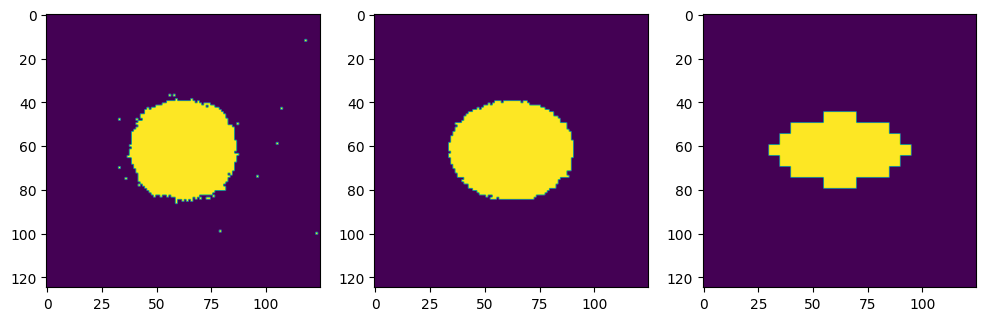

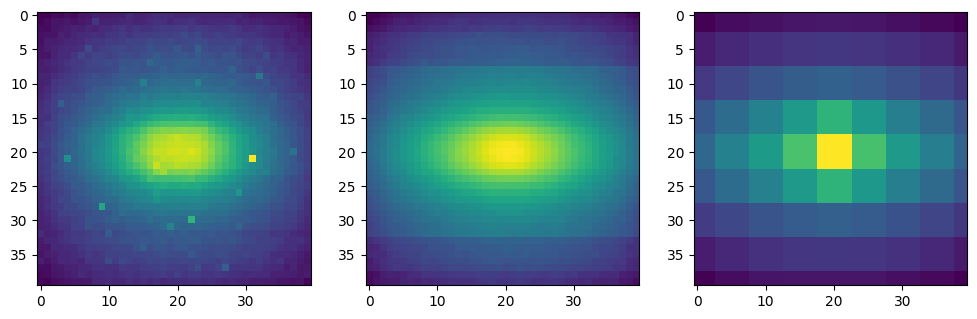

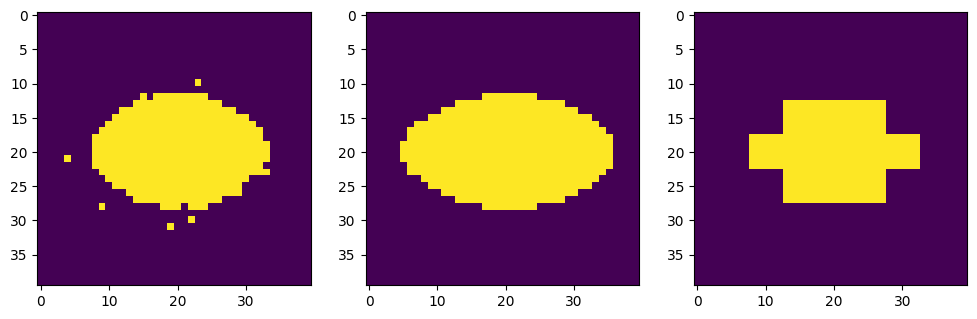

In [42]:
display_data(data0,"Gluon")
display_data(data0,"Gluon",thresh=1)
display_data(crop_center(data0, 40, 40),"Gluon")
display_data(crop_center(data0, 40, 40),"Gluon",thresh=1)

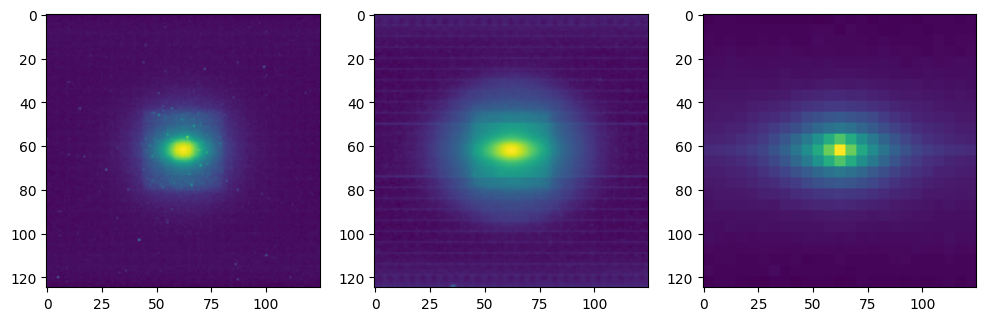

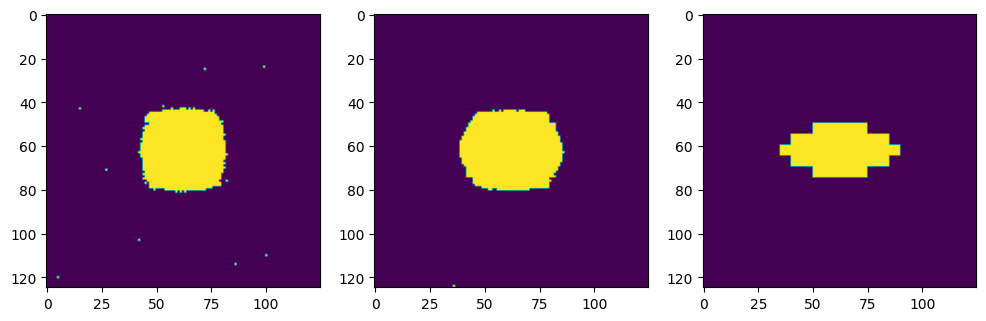

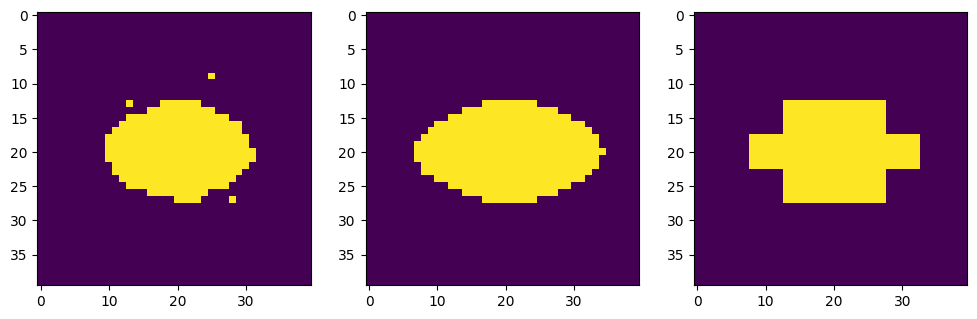

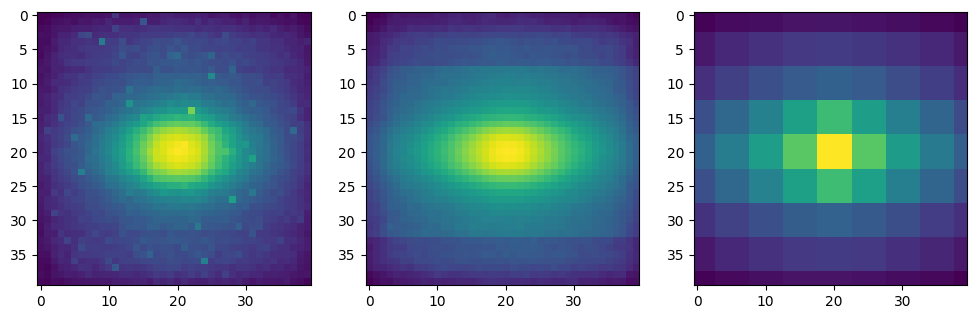

In [43]:
display_data(data1,"Quark")
display_data(data1,"Quark",1)
display_data(crop_center(data1, 40, 40),"Quark",thresh=1)
display_data(crop_center(data1, 40, 40),"Quark")

In [44]:
data0 = crop_center(data0, 40, 40)[:,:,:,0][..., np.newaxis]   # ECAL Channel
data1 = crop_center(data1, 40, 40)[:,:,:,0][..., np.newaxis]   # ECAL Channel

print(data0.shape, data1.shape)

(396950, 40, 40, 1) (396950, 40, 40, 1)


In [45]:
zeros = np.array([0]*len(data0))
ones = np.array([1]*len(data1))

x = np.concatenate((data0,data1), axis =0)
y = np.concatenate((zeros,ones), axis= 0)
del data0, data1

print(x.shape, y.shape)

tcmalloc: large alloc 5080965120 bytes == 0x84e0000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c397559f9 0x7f9c39756147 0x7f9c3975629c 0x6b5d3d 0x7f9c3969af24 0x5f69ca 0x5f74f6 0x570d55 0x569dba 0x5f6eb3 0x56cc1f 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6


(793900, 40, 40, 1) (793900,)


In [46]:
x, y = shuffle(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.118276, random_state=4, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

tcmalloc: large alloc 5080965120 bytes == 0x234a4e2000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c396b2126 0x7f9c397447ea 0x7f9c3974524b 0x5139cc 0x56bf28 0x569dba 0x5f6eb3 0x56cc1f 0x569dba 0x5f6eb3 0x56bacd 0x569dba 0x5f6eb3 0x56bacd 0x569dba 0x5f6eb3 0x5f6082 0x56d2d5 0x569dba 0x5f6eb3 0x56bacd 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd
tcmalloc: large alloc 4480000000 bytes == 0x2479278000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c396b2126 0x7f9c397447ea 0x7f9c3974524b 0x5139cc 0x56bf28 0x569dba 0x5f6eb3 0x56cc1f 0x569dba 0x5f6eb3 0x56bacd 0x501923 0x524f74 0x5f15c4 0x5f745f 0x570d55 0x569dba 0x5f6eb3 0x56cc1f 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6


(700000, 40, 40, 1) (700000,)
(93900, 40, 40, 1) (93900,)


In [47]:
np.savez_compressed('../datasets/downloaded/quark_gluon_3.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

del x_train, x_test, y_train, y_test

In [48]:
data = np.load('../datasets/downloaded/quark_gluon_3.npz', allow_pickle=True)

In [49]:
data['x_train'].shape

tcmalloc: large alloc 4480000000 bytes == 0x2479278000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c39656d08 0x5f73e3 0x57164c 0x569dba 0x5f6eb3 0x56cc1f 0x5f6cd6 0x59e95f 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa


(700000, 40, 40, 1)

tcmalloc: large alloc 4480000000 bytes == 0x2479278000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c39656d08 0x5f73e3 0x57164c 0x569dba 0x5f6eb3 0x56cc1f 0x5f6cd6 0x59e95f 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa
tcmalloc: large alloc 4480000000 bytes == 0x2479278000 @  0x7f9c44dd4680 0x7f9c44df5824 0x7f9c39653064 0x7f9c396537ff 0x7f9c396b1fc5 0x7f9c39656d08 0x5f73e3 0x57164c 0x569dba 0x5f6eb3 0x56cc1f 0x5f6cd6 0x59e95f 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa


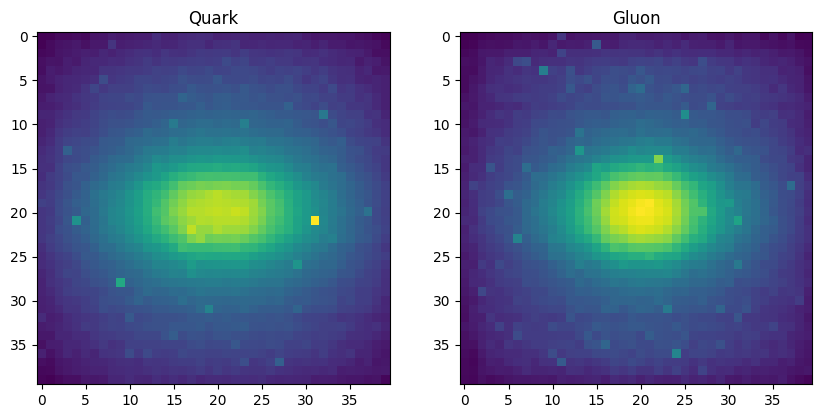

In [50]:
fig2 = plt.figure(figsize=(10,10))
r = 1
c = 2
index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
for i in range(2):
    fig2.add_subplot(r,c,i+1)
    plt.imshow(np.log(np.mean(data['x_train'][index[i],:,:,0], axis=0)))
    plt.title('Quark' if i == 0 else 'Gluon')